   fact_check_id                                              claim  \
0              0  (' Are avocados good for you?', ' Are avocados...   
1              1  (' Can animals have headaches?', ' Can animals...   
2              2  (" Can we help prevent Alzheimer's with diet?"...   
3              3  (' Do any benefits of alcohol outweigh the ris...   
4              4  (' Does acupuncture work for headaches?', ' Do...   

                                           instances title  
0  [(1525653998.0, 'https://metafact.io/factcheck...   NaN  
1  [(1617955634.0, 'https://metafact.io/factcheck...   NaN  
2  [(1525653998.0, 'https://metafact.io/factcheck...   NaN  
3  [(1525653998.0, 'https://metafact.io/factcheck...   NaN  
4  [(1617955595.0, 'https://metafact.io/factcheck...   NaN  


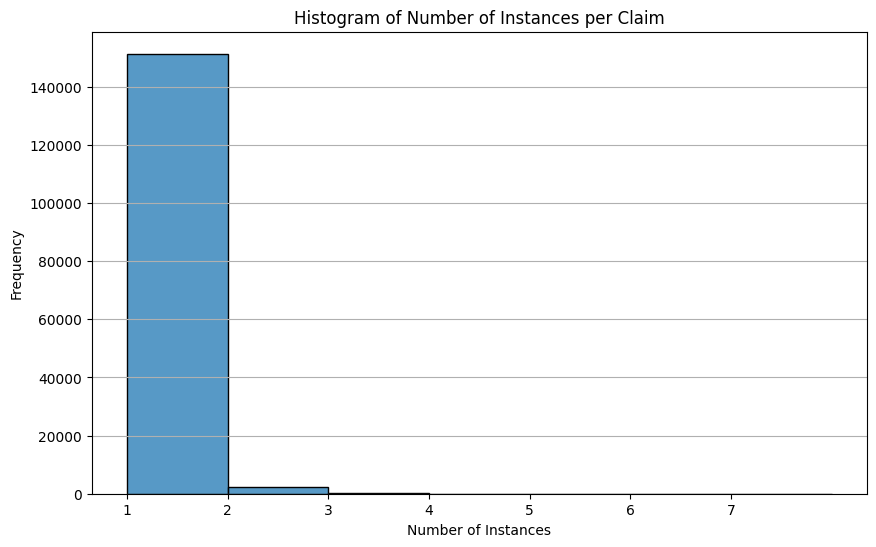

<ipython-input-5-c8a0c941b1d9>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Count', data=language_df, palette='viridis')


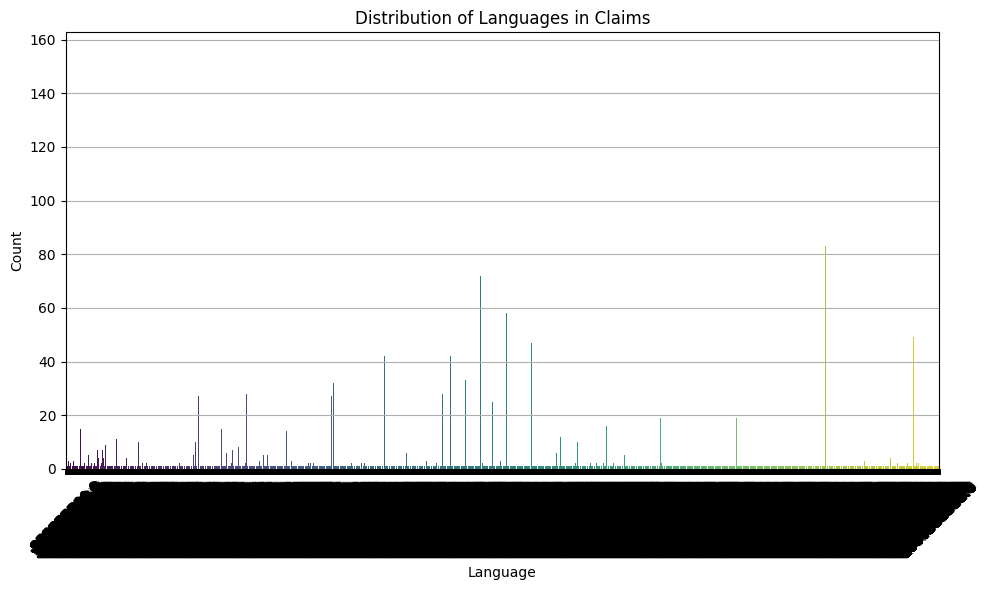

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the data
data = pd.read_csv('fact_checks.csv')

# Check the first few rows of the dataframe
print(data.head())

# Extract the instances column and count the number of instances per claim
data['instances'] = data['instances'].apply(ast.literal_eval)
data['num_instances'] = data['instances'].apply(len)

# Histogram of the number of instances per claim
plt.figure(figsize=(10, 6))
sns.histplot(data['num_instances'], bins=range(1, data['num_instances'].max() + 2), kde=False)
plt.title('Histogram of Number of Instances per Claim')
plt.xlabel('Number of Instances')
plt.ylabel('Frequency')
plt.xticks(range(1, data['num_instances'].max() + 1))
plt.grid(axis='y')
plt.show()

# Count occurrences of different languages in the instances using explode and value_counts
language_counts = data['instances'].apply(lambda x: [lang[0] for lang in x]).explode().value_counts()

# Create a DataFrame for language counts
language_df = pd.DataFrame(language_counts).reset_index()
language_df.columns = ['Language', 'Count']

# Bar plot of language distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Language', y='Count', data=language_df, palette='viridis')
plt.title('Distribution of Languages in Claims')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


   post_id                                     instances  \
0        0                        [(1608571882.0, 'fb')]   
1        1                        [(1586139153.0, 'fb')]   
2        2  [(1610052141.0, 'fb'), (1610072448.0, 'fb')]   
3        3                        [(1645187790.0, 'ig')]   
4        4                        [(1581697500.0, 'fb')]   

                                                 ocr               verdicts  \
0  [('! Dreister Impf-Fake von Markus Söder! Es i...  ['False information']   
1  [("!! WARNING !! A new thing circulating now. ...  ['False information']   
2  [('"Actually, he\'s a damn sight better than a...    ['Missing context']   
3  [('"Australia 50 MILLONES de dosis de "vacuna"...              ['False']   
4  [('"Bienaventurados los perseguidos por mi cau...                     []   

  text  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24431 entries, 0 to 24430
Data columns (total 5 columns):
 #

<ipython-input-12-f3283db9de50>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_counts.index, y=claim_counts.values, palette='viridis')


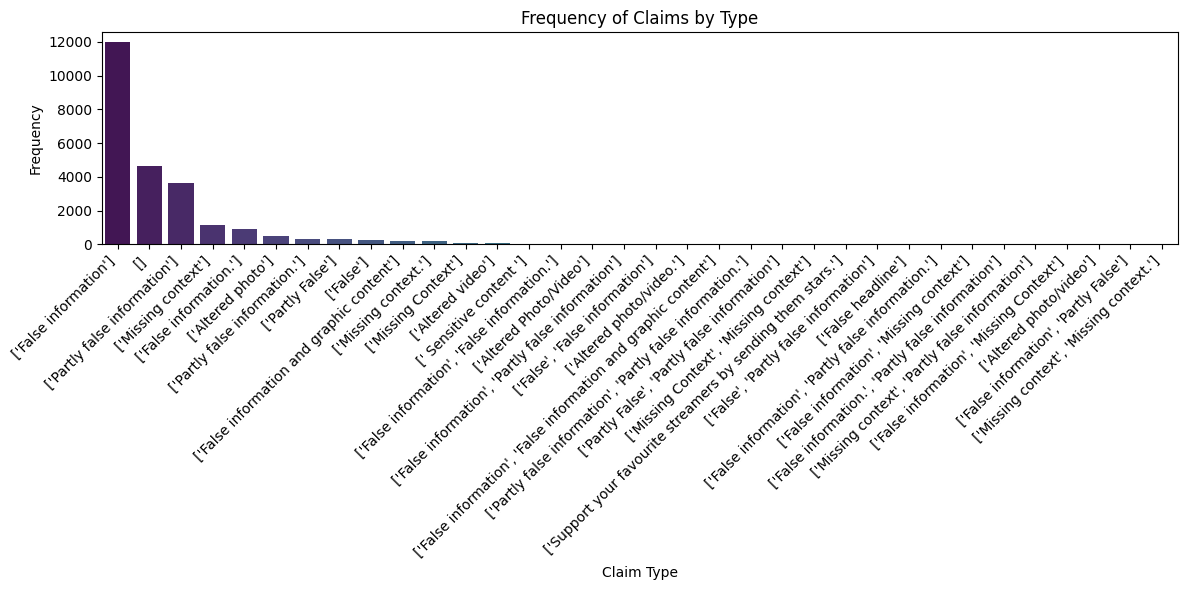

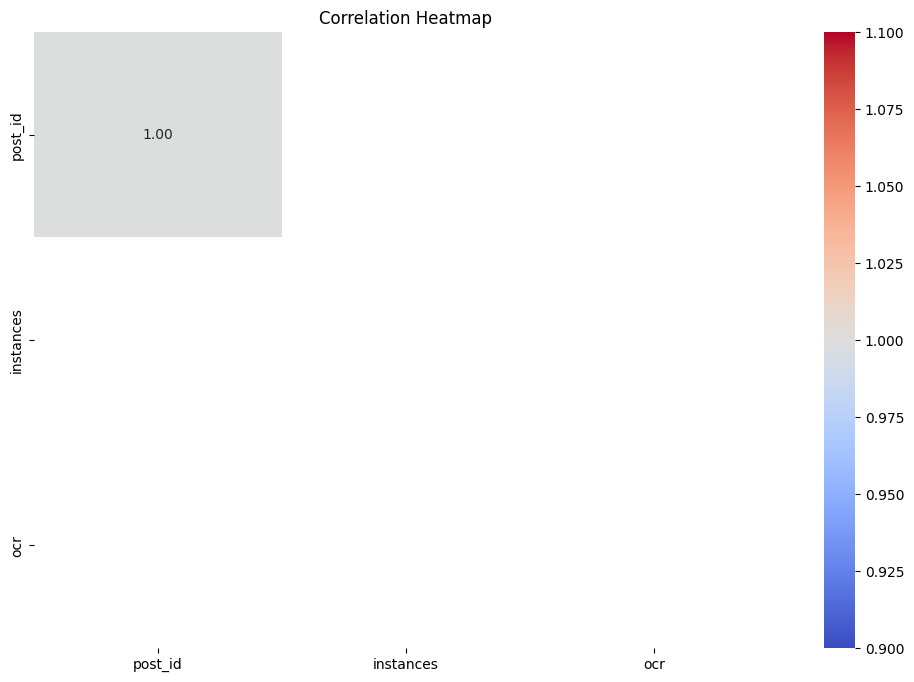

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
df = pd.read_csv('posts.csv')

# Display the first few rows and info about the DataFrame
print(df.head())
print(df.info())

# Example Bar Chart for Frequency of Claims
claim_counts = df['verdicts'].value_counts()
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility
sns.barplot(x=claim_counts.index, y=claim_counts.values, palette='viridis')
plt.title('Frequency of Claims by Type')
plt.xlabel('Claim Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

# Convert specific columns to numeric
df['instances'] = pd.to_numeric(df['instances'], errors='coerce')
df['ocr'] = pd.to_numeric(df['ocr'], errors='coerce')

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Check if there are any numeric columns
if not numeric_df.empty:
    plt.figure(figsize=(12, 8))  # Increase size for correlation heatmap
    correlation_matrix = numeric_df.corr()  # Calculate correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns available for correlation.")


<ipython-input-6-eeb4feb22da8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Fact Checks', data=fact_check_df, palette='coolwarm')


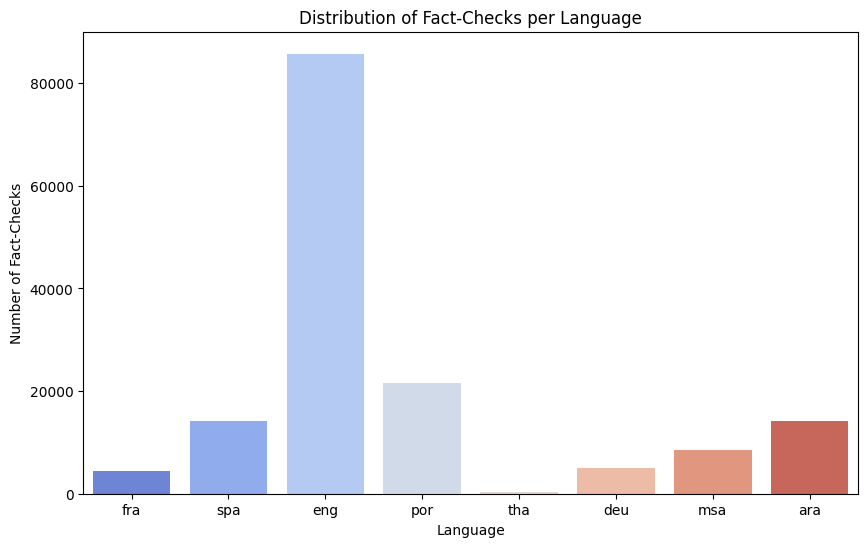

<ipython-input-6-eeb4feb22da8>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='Count', data=retrieved_df, palette='muted')


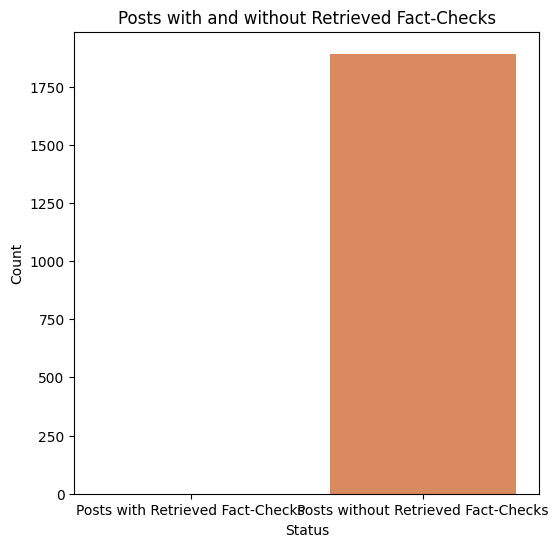

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load tasks.json and monolingual_predictions.json
with open('tasks.json', 'r') as tasks_file:
    tasks_data = json.load(tasks_file)

with open('monolingual_predictions.json', 'r') as predictions_file:
    predictions_data = json.load(predictions_file)

# Part 1: Visualization for Fact-check Distribution per Language
fact_check_counts = {}

# Iterate over each language and count fact-checks
for lang, data in tasks_data['monolingual'].items():
    fact_check_counts[lang] = len(data['fact_checks'])

# Convert to DataFrame for easy visualization
fact_check_df = pd.DataFrame(list(fact_check_counts.items()), columns=['Language', 'Fact Checks'])

# Plot the distribution of fact-checks per language
plt.figure(figsize=(10, 6))
sns.barplot(x='Language', y='Fact Checks', data=fact_check_df, palette='coolwarm')
plt.title('Distribution of Fact-Checks per Language')
plt.xlabel('Language')
plt.ylabel('Number of Fact-Checks')
plt.show()

# Part 2: Visualization for Retrieved Fact-Checks Distribution
retrieved_counts = {
    'Posts with Retrieved Fact-Checks': 0,
    'Posts without Retrieved Fact-Checks': 0
}

# Count posts with and without retrieved fact-checks
for post_id, fact_checks in predictions_data.items():
    if fact_checks:
        retrieved_counts['Posts with Retrieved Fact-Checks'] += 1
    else:
        retrieved_counts['Posts without Retrieved Fact-Checks'] += 1

# Convert to DataFrame for visualization
retrieved_df = pd.DataFrame(list(retrieved_counts.items()), columns=['Status', 'Count'])

# Plot the distribution of posts with/without retrieved fact-checks
plt.figure(figsize=(6, 6))
sns.barplot(x='Status', y='Count', data=retrieved_df, palette='muted')
plt.title('Posts with and without Retrieved Fact-Checks')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


In [ ]:
# import pandas as pd

# # Load the pairs.csv file
# pairs_df = pd.read_csv('pairs.csv')

# # 1. Frequency Analysis: Count how often each post_id corresponds to a fact_check_id
# matching_frequency = pairs_df.groupby(['post_id', 'fact_check_id']).size().reset_index(name='frequency')

# # Display the result of frequency analysis
# print("Matching Frequency:")
# print(matching_frequency)

# # 2. Cross Tabulation: Create a matrix of post_id vs. fact_check_id
# cross_tab = pd.crosstab(pairs_df['post_id'], pairs_df['fact_check_id'])

# # Display the result of cross-tabulation
# print("Cross Tabulation:")
# print(cross_tab)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pairs.csv file
pairs_df = pd.read_csv('pairs.csv')

# 1. Frequency Analysis: Count how often each post_id corresponds to a fact_check_id
matching_frequency = pairs_df.groupby(['post_id', 'fact_check_id']).size().reset_index(name='frequency')

# Display the result of frequency analysis
print("Matching Frequency:")
print(matching_frequency)

# 2. Cross Tabulation: Create a matrix of post_id vs. fact_check_id
cross_tab = pd.crosstab(pairs_df['post_id'], pairs_df['fact_check_id'])

# Display the result of cross-tabulation
print("Cross Tabulation:")
print(cross_tab)

# # Visualization for Matching Frequency
# plt.figure(figsize=(12, 6))
# sns.barplot(data=matching_frequency, x='post_id', y='frequency', hue='fact_check_id')
# plt.title('Frequency of Each post_id Corresponding to fact_check_id')
# plt.xlabel('post_id')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.legend(title='fact_check_id')
# plt.tight_layout()
# plt.show()

# Visualization for Cross Tabulation as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.title('Cross Tabulation of post_id vs. fact_check_id')
plt.xlabel('fact_check_id')
plt.ylabel('post_id')
plt.tight_layout()
plt.show()


Matching Frequency:
       post_id  fact_check_id  frequency
0            0          87108          1
1            2          93524          1
2            3          50973          1
3            4          80729          1
4            5          33862          1
...        ...            ...        ...
25738    28085          52635          1
25739    28087          21743          1
25740    28089          79279          1
25741    28090          54601          1
25742    28091         121314          1

[25743 rows x 3 columns]
Cross Tabulation:
fact_check_id  33      156     214     263     354     371     375     376     \
post_id                                                                         
0                   0       0       0       0       0       0       0       0   
2                   0       0       0       0       0       0       0       0   
3                   0       0       0       0       0       0       0       0   
4                   0       0       0  

Parallel Processing: Using joblib.Parallel to compute BM25 and Sentence-BERT results concurrently.

In [ ]:
import pandas as pd

from rank_bm25 import BM25Okapi
from sentence_transformers import SentenceTransformer, util
import numpy as np
from joblib import Parallel, delayed

# Load datasets
posts_df = pd.read_csv('posts.csv')
fact_checks_df = pd.read_csv('fact_checks.csv')

# Extract relevant text columns
posts = posts_df[['post_id', 'text']].dropna()
fact_checks = fact_checks_df[['fact_check_id', 'claim']].dropna()

### Step 1: BM25 Analysis ###

# Tokenize text for BM25
fact_checks['claim_tokens'] = fact_checks['claim'].apply(lambda x: x.split())
bm25 = BM25Okapi(fact_checks['claim_tokens'].tolist())

# BM25 Scores: Find top matching fact_checks for each post
def compute_bm25_scores(post_row):
    post_id = post_row['post_id']
    post_tokens = post_row['text'].split()
    scores = bm25.get_scores(post_tokens)
    top_indices = np.argsort(scores)[::-1][:5]  # Get top 5 matches
    return [{'post_id': post_id, 'fact_check_id': fact_checks.iloc[i]['fact_check_id'], 'bm25_score': scores[i]} for i in top_indices]

bm25_results = Parallel(n_jobs=-1)(delayed(compute_bm25_scores)(post_row) for _, post_row in posts.iterrows())

# Flatten the results
bm25_results_df = pd.DataFrame([item for sublist in bm25_results for item in sublist])
print("BM25 Results:")
print(bm25_results_df.head())

### Step 2: Sentence-BERT Analysis ###

# Load Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Compute embeddings in batches
post_embeddings = model.encode(posts['text'].tolist(), batch_size=32, convert_to_tensor=True)
fact_check_embeddings = model.encode(fact_checks['claim'].tolist(), batch_size=32, convert_to_tensor=True)

# Calculate cosine similarities
sbert_results = []

def compute_sbert_scores(post_embedding, post_id):
    similarities = util.pytorch_cos_sim(post_embedding, fact_check_embeddings)[0]
    top_indices = np.argsort(similarities, descending=True)[:5]  # Get top 5 matches
    return [{'post_id': post_id, 'fact_check_id': fact_checks.iloc[i]['fact_check_id'], 'sbert_similarity': similarities[i].item()} for i in top_indices]

sbert_results = Parallel(n_jobs=-1)(delayed(compute_sbert_scores)(post_embeddings[idx], post_row['post_id']) for idx, post_row in posts.iterrows())

# Flatten the results
sbert_results_df = pd.DataFrame([item for sublist in sbert_results for item in sublist])
print("Sentence-BERT Results:")
print(sbert_results_df.head())


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


KeyboardInterrupt: 

In [ ]:
import pandas as pd
!pip install rank-bm25
from rank_bm25 import BM25Okapi
from sentence_transformers import SentenceTransformer
import numpy as np
!pip install faiss-cpu
import faiss

# Load datasets
posts_df = pd.read_csv('posts.csv')
fact_checks_df = pd.read_csv('fact_checks.csv')

# Extract relevant text columns
posts = posts_df[['post_id', 'text']].dropna()
fact_checks = fact_checks_df[['fact_check_id', 'claim']].dropna()

### Step 1: Initial Filtering with BM25 ###

# Tokenize text for BM25
fact_checks['claim_tokens'] = fact_checks['claim'].apply(lambda x: x.split())
bm25 = BM25Okapi(fact_checks['claim_tokens'].tolist())

# Set a limit for BM25 filtering (e.g., top 20 matches to reduce dataset size)
top_n_bm25 = 20
bm25_results = []
filtered_fact_checks_indices = set()

# Filter posts to keep only the top_n_bm25 matches
for _, post_row in posts.iterrows():
    post_id = post_row['post_id']
    post_text = post_row['text']
    post_tokens = post_text.split()  # Simple tokenization

    # Calculate BM25 scores
    scores = bm25.get_scores(post_tokens)
    top_indices = np.argsort(scores)[::-1][:top_n_bm25]  # Get top 20 matches

    for idx in top_indices:
        filtered_fact_checks_indices.add(idx)  # Collect unique fact-check indices
        bm25_results.append({
            'post_id': post_id,
            'fact_check_id': fact_checks.iloc[idx]['fact_check_id'],
            'bm25_score': scores[idx]
        })

# Create a reduced fact-check dataset based on BM25 top matches
filtered_fact_checks = fact_checks.iloc[list(filtered_fact_checks_indices)].reset_index(drop=True)

### Step 2: Sentence-BERT + FAISS with Reduced Dataset ###

# Load Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode fact checks from the reduced set with Sentence-BERT
fact_check_embeddings = model.encode(filtered_fact_checks['claim'].tolist(), convert_to_tensor=False)

# Index embeddings with FAISS for fast similarity search
d = fact_check_embeddings.shape[1]
index = faiss.IndexFlatIP(d)  # Use inner product for cosine similarity
index.add(fact_check_embeddings)

# Encode posts in batches for efficiency
post_embeddings = model.encode(posts['text'].tolist(), convert_to_tensor=False)

# Use FAISS to retrieve top 5 matches for each post
k = 5  # Top 5 matches
sbert_results = []
for idx, post_embedding in enumerate(post_embeddings):
    post_id = posts.iloc[idx]['post_id']
    _, top_indices = index.search(np.array([post_embedding]), k)

    for i in top_indices[0]:
        sbert_results.append({
            'post_id': post_id,
            'fact_check_id': filtered_fact_checks.iloc[i]['fact_check_id'],
            'sbert_similarity': np.dot(post_embedding, fact_check_embeddings[i])  # Cosine similarity
        })

# Convert results to DataFrames for further analysis
bm25_results_df = pd.DataFrame(bm25_results)
sbert_results_df = pd.DataFrame(sbert_results)

print("BM25 Results (Top Matches):")
print(bm25_results_df.head())
print("Sentence-BERT + FAISS Results (Top Matches):")
print(sbert_results_df.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

IndexError: tuple index out of range


Total number of unique claims: 153743
Total number of instances across all claims: 156192


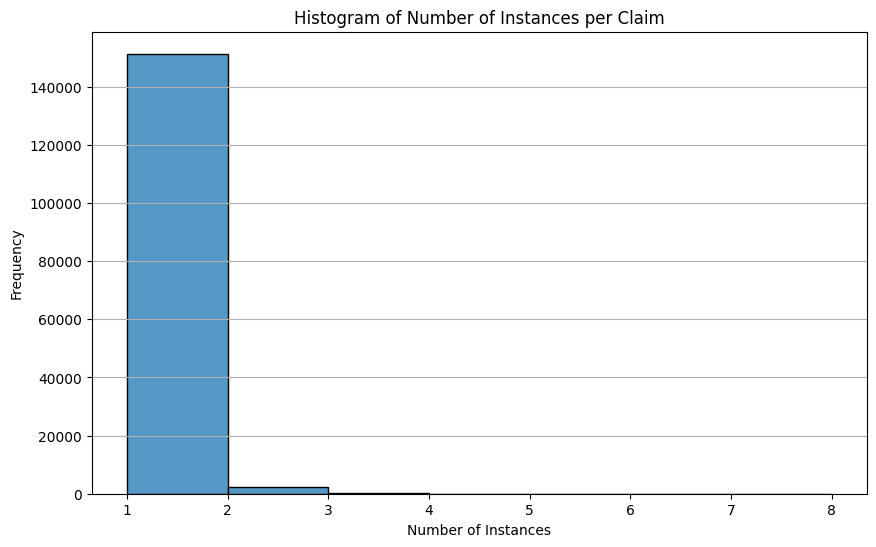


First few rows of posts data:
   post_id                                     instances  \
0        0                        [(1608571882.0, 'fb')]   
1        1                        [(1586139153.0, 'fb')]   
2        2  [(1610052141.0, 'fb'), (1610072448.0, 'fb')]   
3        3                        [(1645187790.0, 'ig')]   
4        4                        [(1581697500.0, 'fb')]   

                                                 ocr               verdicts  \
0  [('! Dreister Impf-Fake von Markus Söder! Es i...  ['False information']   
1  [("!! WARNING !! A new thing circulating now. ...  ['False information']   
2  [('"Actually, he\'s a damn sight better than a...    ['Missing context']   
3  [('"Australia 50 MILLONES de dosis de "vacuna"...              ['False']   
4  [('"Bienaventurados los perseguidos por mi cau...                     []   

  text  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  


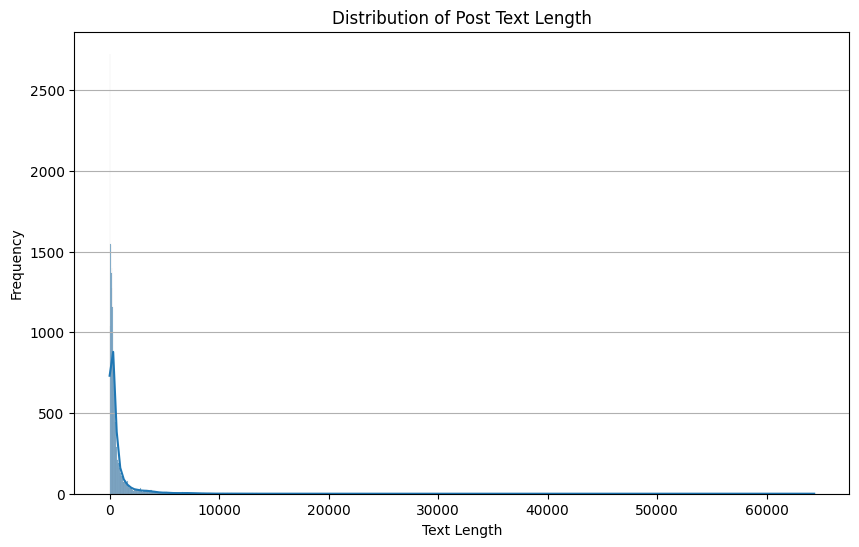


Verdict distribution in posts:
verdicts
False information                                          12034
Partly false information                                    3641
Missing context                                             1177
False information.                                           958
Altered photo                                                484
Partly false information.                                    327
Partly False                                                 320
False                                                        269
False information and graphic content                        212
Missing context.                                             195
Missing Context                                               94
Altered video                                                 84
 Sensitive content                                            31
Altered Photo/Video                                           18
Altered photo/video.                             

<ipython-input-6-d5379b37f52e>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verdict_counts.index, y=verdict_counts.values, palette='viridis')


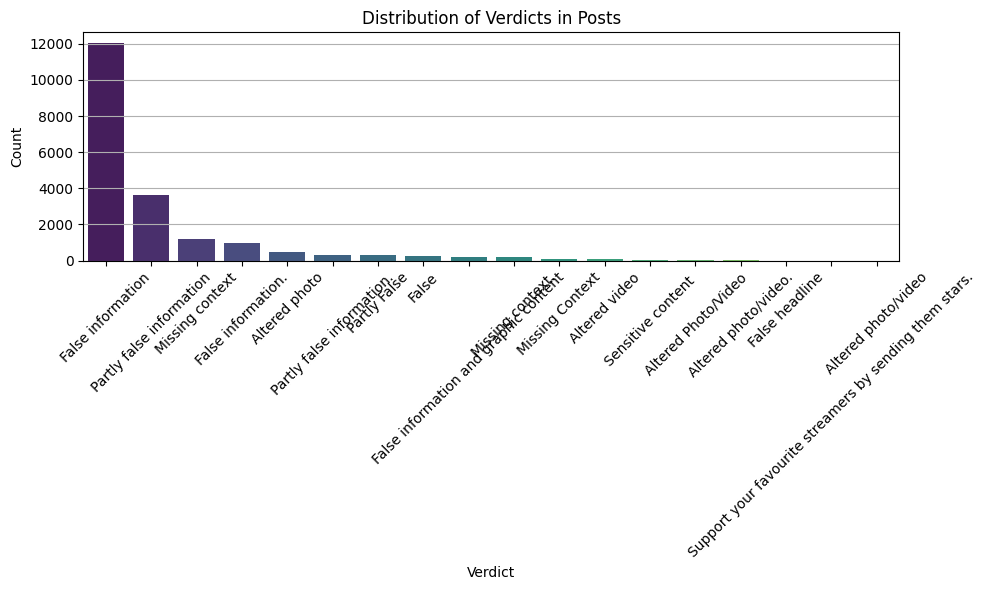


First few rows of pairs data:
   post_id  fact_check_id
0     2228             33
1     2228          23568
2     2228         194577
3     2229             33
4     2229          23568

Distribution of the number of fact checks associated with each post:
count    21988.000000
mean         1.170775
std          0.482360
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: count, dtype: float64


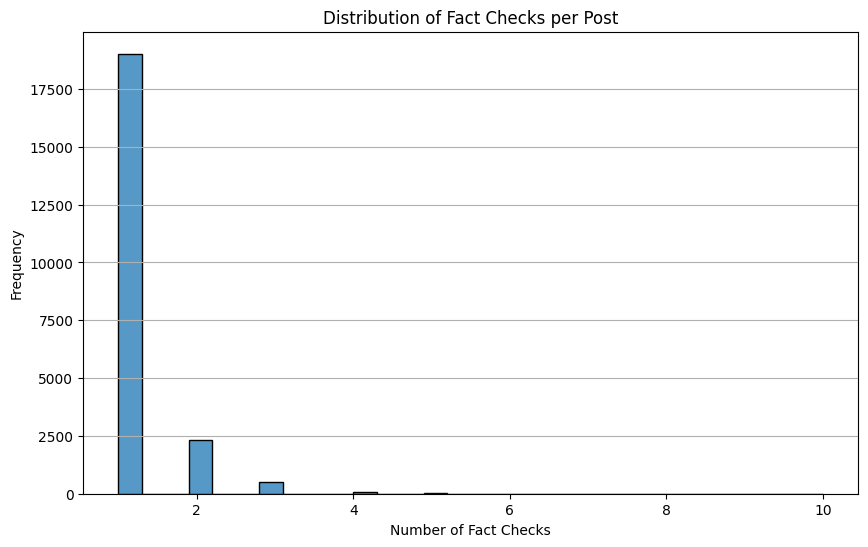


Distribution of the number of posts linked to each fact check:
count    14223.000000
mean         1.809956
std          1.098551
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: count, dtype: float64


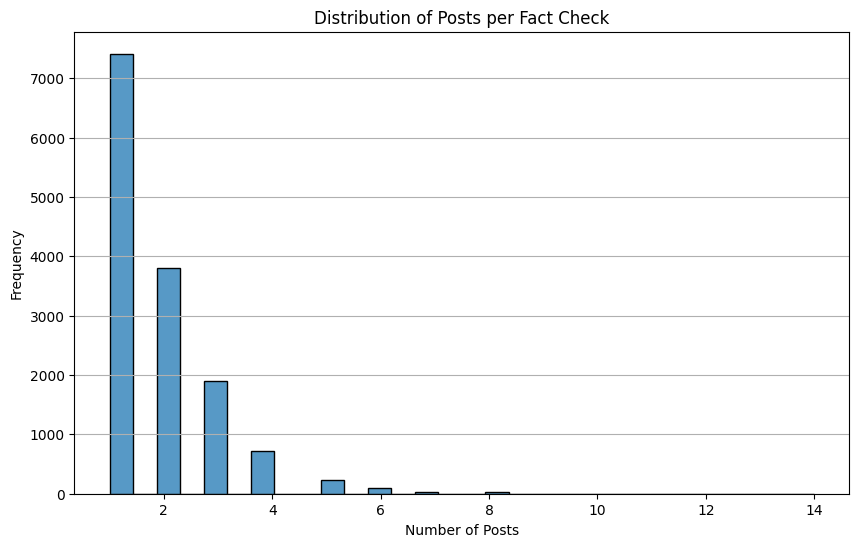


First few rows of the merged dataset:
   post_id  fact_check_id                                     instances  \
0     2228             33  [(1619279171.0, 'fb'), (1619535096.0, 'fb')]   
1     2228          23568  [(1619279171.0, 'fb'), (1619535096.0, 'fb')]   
2     2228         194577  [(1619279171.0, 'fb'), (1619535096.0, 'fb')]   
3     2229             33                        [(1619194935.0, 'fb')]   
4     2229          23568                        [(1619194935.0, 'fb')]   

                                                 ocr             verdicts  \
0  [('WHY DO WE NEED A $4 TRILLION JOBS PLAN, WHE...  [False information]   
1  [('WHY DO WE NEED A $4 TRILLION JOBS PLAN, WHE...  [False information]   
2  [('WHY DO WE NEED A $4 TRILLION JOBS PLAN, WHE...  [False information]   
3  [('WHY DO WE NEED A $4 TRILLION JOBS PLAN, WHE...  [False information]   
4  [('WHY DO WE NEED A $4 TRILLION JOBS PLAN, WHE...  [False information]   

  text  text_length  
0  NaN            3  
1  

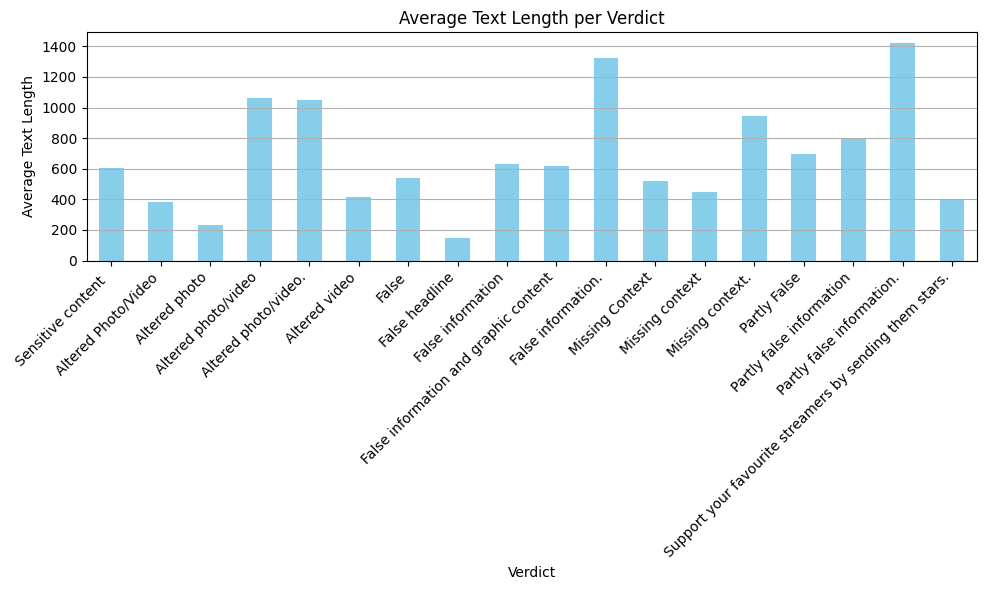

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

### 1. FACT_CHECKS.CSV Analysis ###

# Load fact_checks.csv and count instances per claim
fact_checks = pd.read_csv('fact_checks.csv')
fact_checks['instances'] = fact_checks['instances'].apply(ast.literal_eval)
fact_checks['num_instances'] = fact_checks['instances'].apply(len)

total_claims = fact_checks.shape[0]
total_instances = fact_checks['num_instances'].sum()
print(f"\nTotal number of unique claims: {total_claims}")
print(f"Total number of instances across all claims: {total_instances}")

# Plot instances per claim
plt.figure(figsize=(10, 6))
sns.histplot(fact_checks['num_instances'], bins=range(1, fact_checks['num_instances'].max() + 2), kde=False)
plt.title('Histogram of Number of Instances per Claim')
plt.xlabel('Number of Instances')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

### 2. POSTS.CSV Analysis ###

# Load posts.csv
posts = pd.read_csv('posts.csv')
print("\nFirst few rows of posts data:")
print(posts.head())

# Distribution of text lengths
posts['text_length'] = posts['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(posts['text_length'], kde=True)
plt.title('Distribution of Post Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Extracting and counting unique verdicts
if 'verdicts' in posts.columns:
    posts['verdicts'] = posts['verdicts'].apply(ast.literal_eval)
    verdict_counts = posts['verdicts'].explode().value_counts()
    print("\nVerdict distribution in posts:")
    print(verdict_counts)

    # Bar plot for verdict distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=verdict_counts.index, y=verdict_counts.values, palette='viridis')
    plt.title('Distribution of Verdicts in Posts')
    plt.xlabel('Verdict')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

### 3. PAIRS.CSV Analysis ###

# Load pairs.csv
pairs = pd.read_csv('pairs.csv')
print("\nFirst few rows of pairs data:")
print(pairs.head())

# Count number of fact checks per post
fact_checks_per_post = pairs['post_id'].value_counts()
print("\nDistribution of the number of fact checks associated with each post:")
print(fact_checks_per_post.describe())

# Plot fact checks per post
plt.figure(figsize=(10, 6))
sns.histplot(fact_checks_per_post, bins=30, kde=False)
plt.title('Distribution of Fact Checks per Post')
plt.xlabel('Number of Fact Checks')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Count number of posts per fact check
posts_per_fact_check = pairs['fact_check_id'].value_counts()
print("\nDistribution of the number of posts linked to each fact check:")
print(posts_per_fact_check.describe())

# Plot posts per fact check
plt.figure(figsize=(10, 6))
sns.histplot(posts_per_fact_check, bins=30, kde=False)
plt.title('Distribution of Posts per Fact Check')
plt.xlabel('Number of Posts')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

### 4. INTEGRATING POSTS AND FACT CHECKS ###

# Merge posts and pairs to get the complete data
merged_data = pd.merge(pairs, posts, on='post_id', how='left')
print("\nFirst few rows of the merged dataset:")
print(merged_data.head())

# # Analyze merged data: Average text length per verdict
# if 'verdicts' in merged_data.columns:
#     merged_data['verdicts'] = merged_data['verdicts'].apply(ast.literal_eval)
#     verdict_text_length = merged_data.explode('verdicts').groupby('verdicts')['text_length'].mean()

#     print("\nAverage text length per verdict:")
#     print(verdict_text_length)

#     # Plot average text length per verdict
#     plt.figure(figsize=(10, 6))
#     verdict_text_length.plot(kind='bar', color='skyblue')
#     plt.title('Average Text Length per Verdict')
#     plt.xlabel('Verdict')
#     plt.ylabel('Average Text Length')
#     plt.xticks(rotation=45)
#     plt.grid(axis='y')
#     plt.tight_layout()
#     plt.show()

# Analyze merged data: Average text length per verdict
if 'verdicts' in merged_data.columns:
    # Convert the string representation of lists to actual lists
    merged_data['verdicts'] = merged_data['verdicts'].apply(lambda x: x[1:-1].split(', ') if isinstance(x, str) else x)

    verdict_text_length = merged_data.explode('verdicts').groupby('verdicts')['text_length'].mean()

    print("\nAverage text length per verdict:")
    print(verdict_text_length)

    # Plot average text length per verdict
    plt.figure(figsize=(10, 6))
    verdict_text_length.plot(kind='bar', color='skyblue')
    plt.title('Average Text Length per Verdict')
    plt.xlabel('Verdict')
    plt.ylabel('Average Text Length')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# print(merged_data['verdicts'].head())
# print(merged_data['verdicts'].dtype)


First few rows of posts data:
   post_id                                     instances  \
0        0                        [(1608571882.0, 'fb')]   
1        1                        [(1586139153.0, 'fb')]   
2        2  [(1610052141.0, 'fb'), (1610072448.0, 'fb')]   
3        3                        [(1645187790.0, 'ig')]   
4        4                        [(1581697500.0, 'fb')]   

                                                 ocr               verdicts  \
0  [('! Dreister Impf-Fake von Markus Söder! Es i...  ['False information']   
1  [("!! WARNING !! A new thing circulating now. ...  ['False information']   
2  [('"Actually, he\'s a damn sight better than a...    ['Missing context']   
3  [('"Australia 50 MILLONES de dosis de "vacuna"...              ['False']   
4  [('"Bienaventurados los perseguidos por mi cau...                     []   

  text  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  

Platform distribution across all posts:
platforms
fb    23278
ig     1311
tw  

<ipython-input-8-44acabfc7ae8>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')


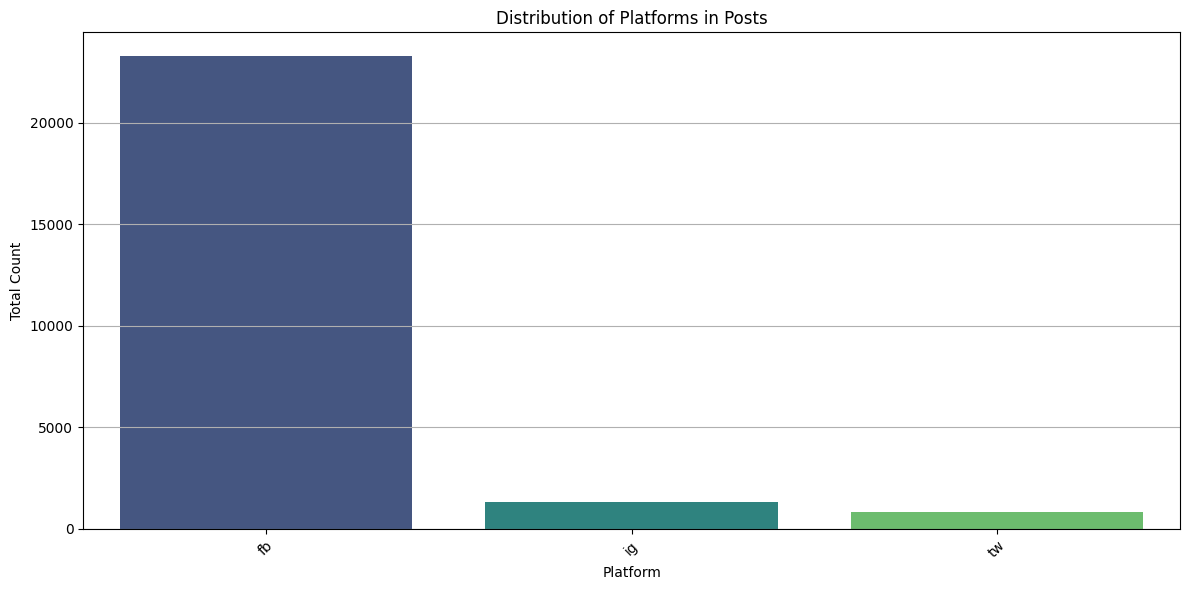


Verdict distribution across all posts:
verdicts
False information                                          12034
Partly false information                                    3641
Missing context                                             1177
False information.                                           958
Altered photo                                                484
Partly false information.                                    327
Partly False                                                 320
False                                                        269
False information and graphic content                        212
Missing context.                                             195
Missing Context                                               94
Altered video                                                 84
 Sensitive content                                            31
Altered Photo/Video                                           18
Altered photo/video.                     

<ipython-input-8-44acabfc7ae8>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verdict_counts.index, y=verdict_counts.values, palette='viridis')


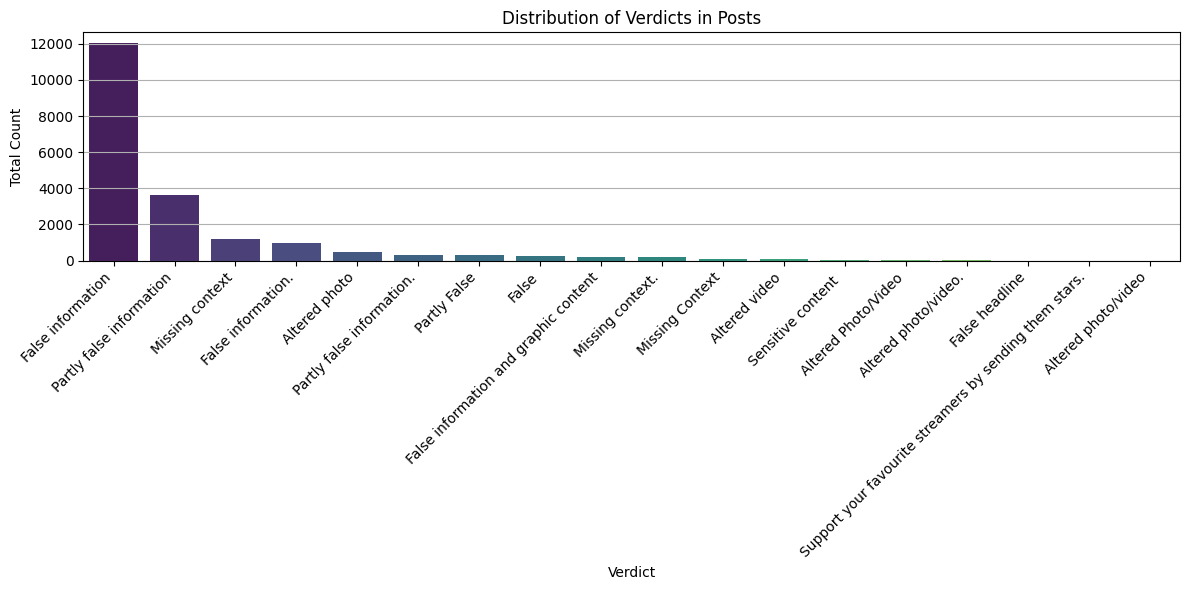

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the data from posts.csv
posts = pd.read_csv('posts.csv')

# Check the first few rows to understand the structure of the data
print("\nFirst few rows of posts data:")
print(posts.head())

if 'instances' in posts.columns:
    # Convert 'instances' column from string representation of list to actual list
    posts['instances'] = posts['instances'].apply(ast.literal_eval)

    # Extract platforms from each entry in the 'instances' list
    posts['platforms'] = posts['instances'].apply(lambda x: [entry[1] for entry in x if isinstance(entry, tuple) and len(entry) > 1])

    # Explode the platforms column to create a row per platform instance
    all_platforms = posts.explode('platforms')['platforms']

    # Count occurrences of each platform
    platform_counts = all_platforms.value_counts()
    print("\nPlatform distribution across all posts:")
    print(platform_counts)

    # Plot the platform distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
    plt.title('Distribution of Platforms in Posts')
    plt.xlabel('Platform')
    plt.ylabel('Total Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No 'instances' column found in posts.csv.")

# Analyze verdicts
if 'verdicts' in posts.columns:
    # Convert 'verdicts' column from string representation of list to actual list
    posts['verdicts'] = posts['verdicts'].apply(ast.literal_eval)

    # Explode the verdicts column to create a row per verdict
    all_verdicts = posts.explode('verdicts')['verdicts']

    # Count occurrences of each verdict
    verdict_counts = all_verdicts.value_counts()
    print("\nVerdict distribution across all posts:")
    print(verdict_counts)

    # Plot the verdict distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=verdict_counts.index, y=verdict_counts.values, palette='viridis')
    plt.title('Distribution of Verdicts in Posts')
    plt.xlabel('Verdict')
    plt.ylabel('Total Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No 'verdicts' column found in posts.csv.")


Language distribution across all posts:
languages
unknown    21386
la           529
sv           266
so           224
lb           189
           ...  
am             3
or             2
no             1
kl             1
lo             1
Name: count, Length: 69, dtype: int64


<ipython-input-9-b561cced8284>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')


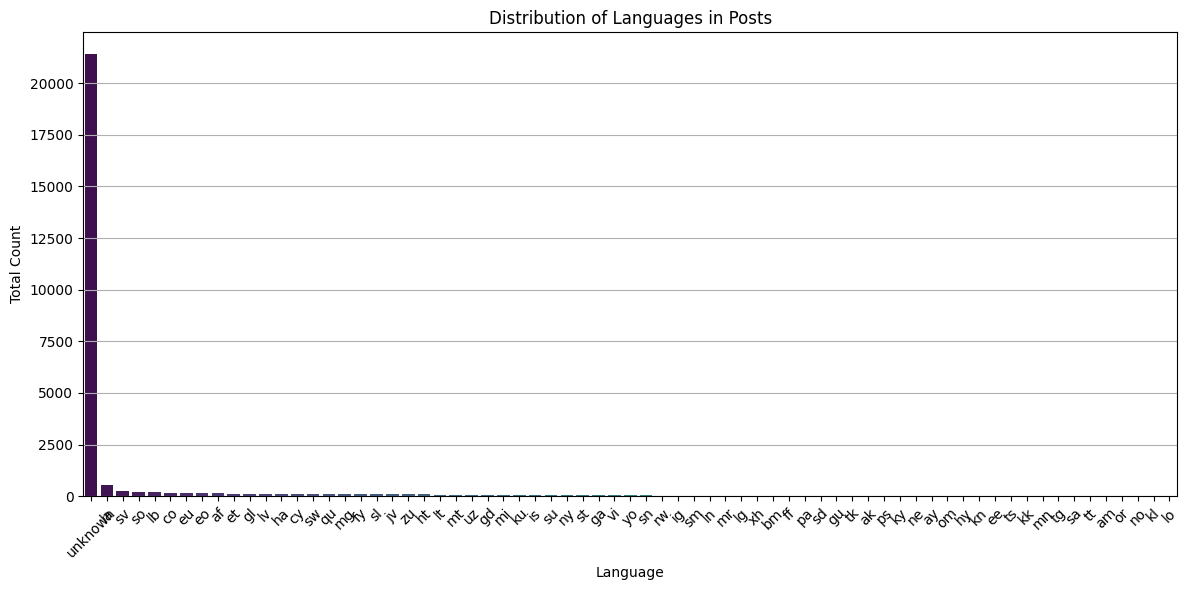


Total number of language instances: 25943
Total number of posts: 24431
Average number of languages per post: 1.06


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re

# Load the data from posts.csv
posts = pd.read_csv('posts.csv')

# Function to extract languages from OCR text
def extract_languages(ocr_text):
    if isinstance(ocr_text, str):
        # Use regex to find language codes in the OCR text
        matches = re.findall(r"'([a-z]{2})'", ocr_text)
        return matches if matches else ['unknown']
    return ['unknown']

# Check if 'ocr' column exists
if 'ocr' in posts.columns:
    # Extract languages from OCR text
    posts['languages'] = posts['ocr'].apply(extract_languages)

    # Explode the languages column to create a row per language instance
    all_languages = posts.explode('languages')['languages']

    # Count occurrences of each language
    language_counts = all_languages.value_counts()
    print("\nLanguage distribution across all posts:")
    print(language_counts)

    # Plot the language distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')
    plt.title('Distribution of Languages in Posts')
    plt.xlabel('Language')
    plt.ylabel('Total Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Calculate and print some statistics
    total_languages = language_counts.sum()
    total_posts = len(posts)
    print(f"\nTotal number of language instances: {total_languages}")
    print(f"Total number of posts: {total_posts}")
    print(f"Average number of languages per post: {total_languages / total_posts:.2f}")

else:
    print("No 'ocr' column found in posts.csv with language information.")


Language distribution across all posts:
languages
unknown    21386
la           529
sv           266
so           224
lb           189
           ...  
am             3
or             2
no             1
kl             1
lo             1
Name: count, Length: 69, dtype: int64


<ipython-input-10-ae6622a0885d>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_20_languages.index, x=top_20_languages.values, palette='viridis')


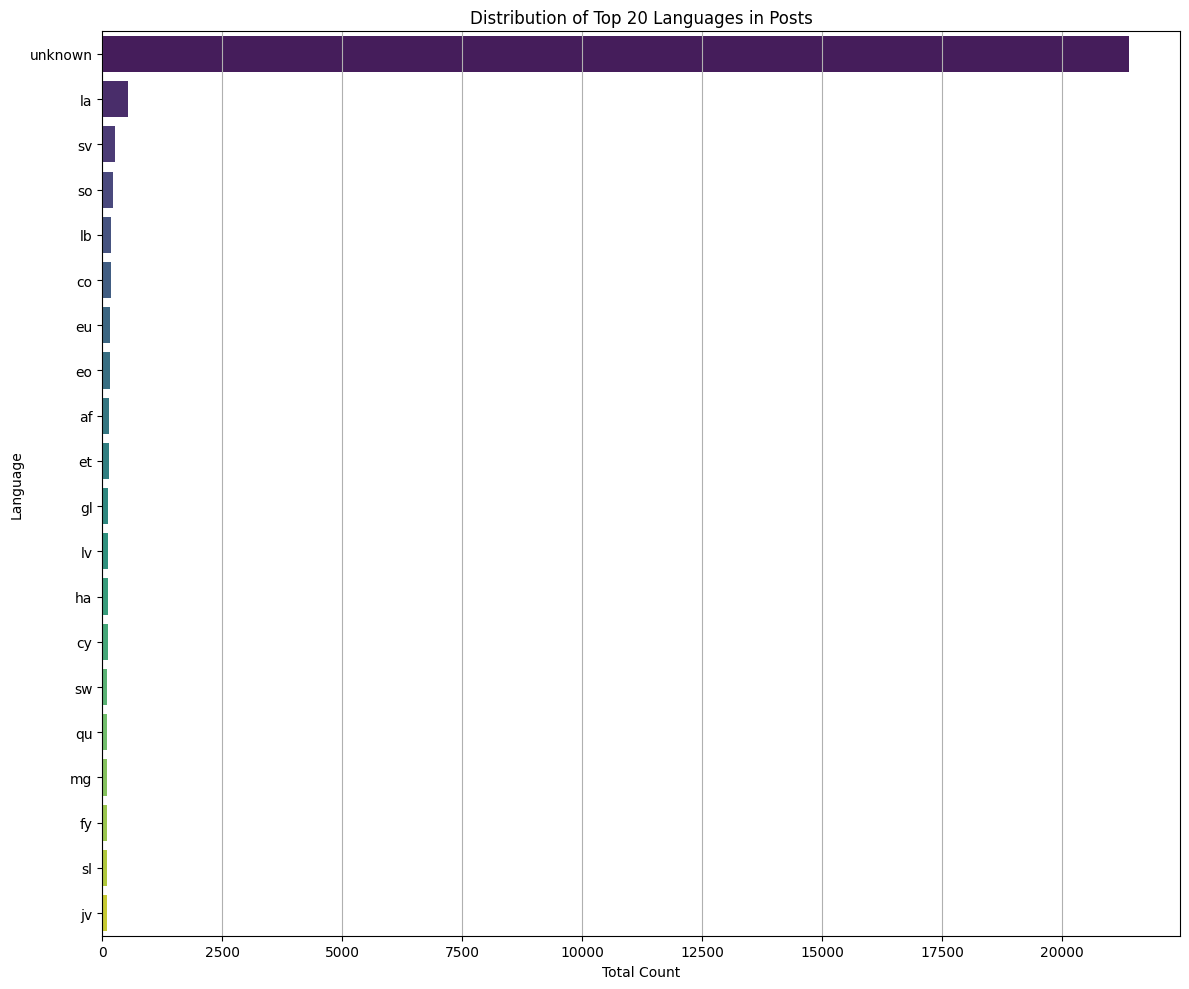


Total number of language instances: 25943
Total number of posts: 24431
Average number of languages per post: 1.06


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re

# Load the data from posts.csv
posts = pd.read_csv('posts.csv')

# Function to extract languages from OCR text
def extract_languages(ocr_text):
    if isinstance(ocr_text, str):
        # Use regex to find language codes in the OCR text
        matches = re.findall(r"'([a-z]{2})'", ocr_text)
        return matches if matches else ['unknown']
    return ['unknown']

# Check if 'ocr' column exists
if 'ocr' in posts.columns:
    # Extract languages from OCR text
    posts['languages'] = posts['ocr'].apply(extract_languages)

    # Explode the languages column to create a row per language instance
    all_languages = posts.explode('languages')['languages']

    # Count occurrences of each language
    language_counts = all_languages.value_counts()
    print("\nLanguage distribution across all posts:")
    print(language_counts)

    # Plot the language distribution (top 20 languages)
    plt.figure(figsize=(12, 10))
    top_20_languages = language_counts.nlargest(20)
    sns.barplot(y=top_20_languages.index, x=top_20_languages.values, palette='viridis')
    plt.title('Distribution of Top 20 Languages in Posts')
    plt.xlabel('Total Count')
    plt.ylabel('Language')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

    # Calculate and print some statistics
    total_languages = language_counts.sum()
    total_posts = len(posts)
    print(f"\nTotal number of language instances: {total_languages}")
    print(f"Total number of posts: {total_posts}")
    print(f"Average number of languages per post: {total_languages / total_posts:.2f}")

else:
    print("No 'ocr' column found in posts.csv with language information.")

In [ ]:
import pandas as pd
!pip install rank_bm25
from rank_bm25 import BM25Okapi
import numpy as np
from multiprocessing import Pool, cpu_count

# Load your datasets
posts_df = pd.read_csv('posts.csv')
fact_checks_df = pd.read_csv('fact_checks(2).csv')

# Step 1: Handle NaN and non-string entries in 'text' and 'claim' columns
posts_df['text'] = posts_df['text'].fillna('').astype(str)
fact_checks_df['claim'] = fact_checks_df['claim'].fillna('').astype(str)

# Step 2: Tokenize text data
fact_checks_df['claim_tokens'] = fact_checks_df['claim'].apply(lambda x: x.lower().split())
posts_df['text_tokens'] = posts_df['text'].apply(lambda x: x.lower().split())

# Step 3: Set up BM25 with the filtered fact checks
bm25 = BM25Okapi(fact_checks_df['claim_tokens'].tolist())

# Function to calculate BM25 for each post in parallel
def calculate_bm25_for_post(post_row):
    post_id = post_row['post_id']
    post_tokens = post_row['text_tokens']
    scores = bm25.get_scores(post_tokens)

    # Retrieve top 5 matches
    top_indices = np.argsort(scores)[::-1][:5]
    top_fact_checks = fact_checks_df.iloc[top_indices]

    return [
        {'post_id': post_id, 'fact_check_id': row.fact_check_id, 'bm25_score': scores[i]}
        for i, row in enumerate(top_fact_checks.itertuples())
    ]

# Step 4: Use multiprocessing to speed up computation
with Pool(cpu_count()) as pool:
    results = pool.map(calculate_bm25_for_post, [row for _, row in posts_df.iterrows()])

# Flatten results and convert to DataFrame
bm25_results = [item for sublist in results for item in sublist]
bm25_results_df = pd.DataFrame(bm25_results)

print("Optimized BM25 Results:")
print(bm25_results_df.head())


Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
  File "<ipy

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from rank_bm25 import BM25Okapi
import numpy as np

# Load your datasets
posts_df = pd.read_csv('posts.csv')
fact_checks_df = pd.read_csv('fact_checks.csv')
pairs_df = pd.read_csv('pairs.csv')

# Step 1: Filter `fact_checks_df` to include only fact checks that are referenced in `pairs_df`
relevant_fact_check_ids = pairs_df['fact_check_id'].unique()
filtered_fact_checks_df = fact_checks_df[fact_checks_df['fact_check_id'].isin(relevant_fact_check_ids)]

# Step 2: Merge `posts_df` and `filtered_fact_checks_df` via `pairs_df` to get relevant text data for BM25
merged_df = pairs_df.merge(posts_df, on='post_id').merge(filtered_fact_checks_df, on='fact_check_id')

# Ensure there are no NaN values in the 'text' or 'claim' columns
merged_df['text'] = merged_df['text'].fillna('').astype(str)
merged_df['claim'] = merged_df['claim'].fillna('').astype(str)

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

merged_df['post_tokens'] = merged_df['text'].apply(preprocess)
merged_df['claim_tokens'] = merged_df['claim'].apply(preprocess)


# Step 3: Tokenize the text fields for BM25
# merged_df['post_tokens'] = merged_df['text'].apply(lambda x: x.lower().split())
# merged_df['claim_tokens'] = merged_df['claim'].apply(lambda x: x.lower().split())

# Step 4: Initialize BM25 model on the claim tokens
# For efficiency, create a BM25 model for each post's relevant claims
# bm25_results = []
# for post_id, group in merged_df.groupby('post_id'):
#     post_tokens = group['post_tokens'].iloc[0]  # All rows for the post have the same tokens
#     claim_tokens_list = group['claim_tokens'].tolist()
#     fact_check_ids = group['fact_check_id'].tolist()

#     # Initialize BM25 for the current group of claims
#     bm25 = BM25Okapi(claim_tokens_list)

#     # Compute BM25 scores for the current post
#     scores = bm25.get_scores(post_tokens)

#     # Step 5: Store results with top-scoring fact-checks
#     top_indices = np.argsort(scores)[::-1]  # Sort in descending order
#     for i in top_indices[:5]:  # Retrieve the top 5 matches
#         bm25_results.append({
#             'post_id': post_id,
#             'fact_check_id': fact_check_ids[i],
#             'bm25_score': scores[i]
#         })

# # Convert results to a DataFrame for easy viewing and further analysis
# bm25_results_df = pd.DataFrame(bm25_results)

# print("Top BM25 Results for Each Post:")
# print(bm25_results_df.head())


# Initialize BM25 model on the claim tokens
bm25_results = []
for post_id, group in merged_df.groupby('post_id'):
    post_tokens = group['post_tokens'].iloc[0]  # All rows for the post have the same tokens
    claim_tokens_list = group['claim_tokens'].tolist()
    fact_check_ids = group['fact_check_id'].tolist()

    # Initialize BM25 with tuned parameters for the current group of claims
    bm25 = BM25Okapi(claim_tokens_list, k1=1.5, b=0.75)

    has_overlap = any(set(post_tokens) & set(claim_tokens) for claim_tokens in claim_tokens_list)
    if not has_overlap:
        scores = np.zeros(len(claim_tokens_list))
    else:
        scores = bm25.get_scores(post_tokens)

    # Compute BM25 scores only if there is token overlap
    # scores = bm25.get_scores(post_tokens) if set(post_tokens) & set(claim_tokens_list) else np.zeros(len(claim_tokens_list))
    scores = bm25.get_scores(post_tokens) if has_overlap else np.zeros(len(claim_tokens_list))
    # Store results with top-scoring fact-checks
    top_indices = np.argsort(scores)[::-1]  # Sort in descending order
    for i in top_indices[:5]:  # Retrieve the top 5 matches
        bm25_results.append({
            'post_id': post_id,
            'fact_check_id': fact_check_ids[i],
            'bm25_score': scores[i]
        })

# Convert results to a DataFrame for easy viewing and further analysis
bm25_results_df = pd.DataFrame(bm25_results)

print("Top BM25 Results for Each Post after adjustments:")
print(bm25_results_df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top BM25 Results for Each Post after adjustments:
   post_id  fact_check_id  bm25_score
0        0          87108         0.0
1        2          93524         0.0
2        3          50973         0.0
3        4          80729         0.0
4        5          33862         0.0


In [ ]:
merged_df['overlap'] = merged_df.apply(lambda row: set(row['post_tokens']).intersection(row['claim_tokens']), axis=1)
print("Token Overlap Example:")
print(merged_df[['post_id', 'fact_check_id', 'overlap']].head())


Token Overlap Example:
   post_id  fact_check_id overlap
0     2228             33      {}
1     2228          23568      {}
2     2228         194577      {}
3     2229             33      {}
4     2229          23568      {}


In [ ]:
# Check token overlap
merged_df['overlap'] = merged_df.apply(lambda row: set(row['post_tokens']).intersection(row['claim_tokens']), axis=1)
print(merged_df[['post_id', 'fact_check_id', 'overlap']].head())


   post_id  fact_check_id overlap
0     2228             33      {}
1     2228          23568      {}
2     2228         194577      {}
3     2229             33      {}
4     2229          23568      {}


In [ ]:
!pip install sentence-transformers torch
!pip uninstall torch torchvision torchaudio -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Found existing installation: torch 2.5.0+cu121
Uninstalling torch-2.5.0+cu121:
  Successfully uninstalled torch-2.5.0+cu121
Found existing installation: torchvision 0.20.0+cu121
Uninstalling torchvision-0.20.0+cu121:
  Successfully uninstalled torchvision-0.20.0+cu121
Found existing installation: torchaudio 2.5.0+cu121
Uninstalling torchaudio-2.5.0+cu121:
  Successfully uninstalled torchaudio-2.5.0+cu121
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 838.3/838.3 MB 790.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sentence_transformers import util
import torch
from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def load_data(posts_file, fact_checks_file, pairs_file):
    """
    Load posts, claims, and their pairs.
    """
    posts_df = pd.read_csv(posts_file)
    claims_df = pd.read_csv(fact_checks_file)
    pairs_df = pd.read_csv(pairs_file)

    return posts_df, claims_df, pairs_df

def split_data(pairs_df):
    """
    Split pairs into train and test sets.
    """
    train_pairs, test_pairs = train_test_split(pairs_df, test_size=0.2, random_state=42)
    return train_pairs, test_pairs

def get_text_by_id(df, column_id, text_column, ids):
    """
    Retrieve text content based on IDs.
    """
    return df[df[column_id].isin(ids)][text_column].tolist()

def generate_embeddings(model, texts):
    """
    Generate embeddings for a list of texts using Sentence-BERT.
    """
    return model.encode(texts, convert_to_tensor=True, show_progress_bar=True)

def compute_cosine_similarity(post_embeddings, claim_embeddings):
    """
    Compute cosine similarity between posts and claims.
    """
    return util.cos_sim(post_embeddings, claim_embeddings)

def evaluate_model(test_pairs, posts_df, claims_df, model):
    """
    Evaluate the model on the test set.
    """
    post_texts = get_text_by_id(posts_df, 'post_id', 'post_text', test_pairs['post_id'])
    claim_texts = get_text_by_id(claims_df, 'claim_id', 'claim_text', test_pairs['fact_check_id'])

    # Generate embeddings
    post_embeddings = generate_embeddings(model, post_texts)
    claim_embeddings = generate_embeddings(model, claim_texts)

    # Compute cosine similarities
    cosine_scores = compute_cosine_similarity(post_embeddings, claim_embeddings)

    # Evaluate using Mean Reciprocal Rank (MRR)
    mrr = 0
    for i, row in enumerate(cosine_scores):
        scores = row.tolist()
        # Assuming the actual claim is the correct match
        correct_index = i
        sorted_indices = sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)
        rank = sorted_indices.index(correct_index) + 1
        mrr += 1 / rank
    mrr /= len(cosine_scores)
    print(f"Mean Reciprocal Rank (MRR): {mrr:.4f}")

def main(posts_file, fact_checks_file, pairs_file, model_name='sentence-transformers/all-MiniLM-L6-v2'):
    # Load data
    print("Loading data...")
    posts_df, claims_df, pairs_df = load_data(posts_file, fact_checks_file, pairs_file)

    # Split data into train and test sets
    print("Splitting data...")
    train_pairs, test_pairs = split_data(pairs_df)

    # Load Sentence-BERT model
    print(f"Loading model: {model_name}")
    model = SentenceTransformer(model_name, device=device)

    # Evaluate the model on the test set
    print("Evaluating model...")
    evaluate_model(test_pairs, posts_df, claims_df, model)

if __name__ == "__main__":
    # Update with your dataset paths
    posts_file = 'posts.csv'
    fact_checks_file = 'fact_checks.csv'
    pairs_file = 'pairs.csv'
    main(posts_file, fact_checks_file, pairs_file)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Loading data...
Splitting data...
Loading model: sentence-transformers/all-MiniLM-L6-v2


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Evaluating model...


KeyError: 'post_text'

Script 1: Combining OCR and Caption Text



In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# ... (load_data, split_data, get_text_by_id, generate_embeddings, compute_cosine_similarity functions remain the same) ...

def evaluate_model_combined(test_pairs, posts_df, claims_df, model):
    """
    Evaluate the model on the test set using combined OCR and caption text.
    """
    ocr_texts = get_text_by_id(posts_df, 'post_id', 'ocr', test_pairs['post_id'])
    caption_texts = get_text_by_id(posts_df, 'post_id', 'text', test_pairs['post_id'])

    # Handle potential NaN or empty values in OCR and caption text
    ocr_texts = [str(text) if pd.notna(text) else "" for text in ocr_texts]
    caption_texts = [str(text) if pd.notna(text) else "" for text in caption_texts]

    # Combine OCR and caption text
    post_texts = [ocr + " " + caption for ocr, caption in zip(ocr_texts, caption_texts)]
    claim_texts = get_text_by_id(claims_df, 'fact_check_id', 'claim', test_pairs['fact_check_id'])

    # ... (rest of the evaluate_model function remains the same) ...

def main_combined(posts_file, fact_checks_file, pairs_file, model_name='sentence-transformers/all-MiniLM-L6-v2'):
    # ... (load data, split data, load model remain the same) ...
        # Load data
    print("Loading data...")
    posts_df, claims_df, pairs_df = load_data(posts_file, fact_checks_file, pairs_file)

    # Split data into train and test sets
    print("Splitting data...")
    train_pairs, test_pairs = split_data(pairs_df) # This line was missing, causing the error

    # Load Sentence-BERT model
    print(f"Loading model: {model_name}")
    model = SentenceTransformer(model_name, device=device)
    # Evaluate the model using combined text
    print("Evaluating model with combined OCR and caption text...")
    evaluate_model_combined(test_pairs, posts_df, claims_df, model)

if __name__ == "__main__":
    # ... (file paths remain the same) ...
    main_combined(posts_file, fact_checks_file, pairs_file)

Loading data...
Splitting data...
Loading model: sentence-transformers/all-MiniLM-L6-v2


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Evaluating model with combined OCR and caption text...


Script 2: Comparing Claims with OCR and Caption *Separately*

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# ... (load_data, split_data, get_text_by_id, generate_embeddings, compute_cosine_similarity functions remain the same) ...

def evaluate_model_separate(test_pairs, posts_df, claims_df, model, text_column):
    """
    Evaluate the model on the test set using either OCR or caption text.
    """
    post_texts = get_text_by_id(posts_df, 'post_id', text_column, test_pairs['post_id'])
    claim_texts = get_text_by_id(claims_df, 'fact_check_id', 'claim', test_pairs['fact_check_id'])

    #Handle potential NaN or empty values
    post_texts = [str(text) if pd.notna(text) else "" for text in post_texts]

    # ... (rest of the evaluate_model function remains the same) ...

def main_separate(posts_file, fact_checks_file, pairs_file, model_name='sentence-transformers/all-MiniLM-L6-v2'):
    # ... (load data, split data, load model remain the same) ...

    print("Loading data...")
    posts_df, claims_df, pairs_df = load_data(posts_file, fact_checks_file, pairs_file)

    # Split data into train and test sets
    print("Splitting data...")
    train_pairs, test_pairs = split_data(pairs_df)  # Call split_data to define train_pairs and test_pairs

    # Load Sentence-BERT model
    print(f"Loading model: {model_name}")
    model = SentenceTransformer(model_name, device=device)

    # Evaluate the model using OCR text
    print("Evaluating model with OCR text...")
    evaluate_model_separate(test_pairs, posts_df, claims_df, model, 'ocr') # Changed 'OCR' to 'ocr' to match column name

    # Evaluate the model using OCR text
    print("Evaluating model with OCR text...")
    evaluate_model_separate(test_pairs, posts_df, claims_df, model, 'ocr')

    # Evaluate the model using caption text
    print("Evaluating model with caption text...")
    evaluate_model_separate(test_pairs, posts_df, claims_df, model, 'text')

if __name__ == "__main__":
    # ... (file paths remain the same) ...
    main_separate(posts_file, fact_checks_file, pairs_file)

Loading data...
Splitting data...
Loading model: sentence-transformers/all-MiniLM-L6-v2


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Evaluating model with OCR text...
Evaluating model with OCR text...
Evaluating model with caption text...


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
from sklearn.model_selection import train_test_split
import warnings
from tqdm import tqdm

# Set device for computation (GPU if available, otherwise CPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def load_data(posts_file, fact_checks_file, pairs_file):
    """Load posts, claims, and their pairs."""
    posts_df = pd.read_csv(posts_file)
    claims_df = pd.read_csv(fact_checks_file)
    pairs_df = pd.read_csv(pairs_file)
    return posts_df, claims_df, pairs_df

def split_data(pairs_df):
    """Split pairs into train and test sets."""
    train_pairs, test_pairs = train_test_split(pairs_df, test_size=0.2, random_state=42)
    return train_pairs, test_pairs

def get_text_by_id(df, column_id, text_column, ids):
    """Retrieve text content based on IDs."""
    return df[df[column_id].isin(ids)][text_column].tolist()

def generate_embeddings(model, texts):
    """Generate embeddings for a list of texts using Sentence-BERT."""
    return model.encode(texts, convert_to_tensor=True, show_progress_bar=True)

def compute_cosine_similarity(post_embeddings, claim_embeddings):
    """Compute cosine similarity between posts and claims."""
    return util.cos_sim(post_embeddings, claim_embeddings)


def compute_mrr(cosine_scores, test_pairs):
    """Compute Mean Reciprocal Rank (MRR) for evaluation."""
    mrr = 0
    num_posts, num_claims = cosine_scores.shape

    for i in range(len(test_pairs)):
        # Ensure that `i` is within bounds of the cosine_scores
        if i >= num_posts:
            print(f"Skipping index {i} as it is out of bounds for cosine_scores with size {num_posts}")
            continue

        # Get similarity scores for this instance
        scores = cosine_scores[i].tolist()

        # Sort scores to get rank
        sorted_indices = sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)

        try:
            # Assuming `i` corresponds to the correct index for the current claim
            rank = sorted_indices.index(i) + 1
        except ValueError:
            rank = len(scores) + 1

        mrr += 1 / rank

    # Calculate average MRR
    mrr /= len(test_pairs)
    return mrr


def evaluate_model_combined(test_pairs, posts_df, claims_df, model):
    """Evaluate the model on the test set using combined OCR and caption text."""
    ocr_texts = get_text_by_id(posts_df, 'post_id', 'ocr', test_pairs['post_id'])
    caption_texts = get_text_by_id(posts_df, 'post_id', 'text', test_pairs['post_id'])

    # Handle NaN values
    ocr_texts = [str(text) if pd.notna(text) else "" for text in ocr_texts]
    caption_texts = [str(text) if pd.notna(text) else "" for text in caption_texts]

    # Combine OCR and caption texts
    post_texts = [ocr + " " + caption for ocr, caption in zip(ocr_texts, caption_texts)]
    claim_texts = get_text_by_id(claims_df, 'fact_check_id', 'claim', test_pairs['fact_check_id'])

    # Generate embeddings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        post_embeddings = generate_embeddings(model, post_texts)
        claim_embeddings = generate_embeddings(model, claim_texts)

    # Compute cosine similarities
    cosine_scores = compute_cosine_similarity(post_embeddings, claim_embeddings)

    # Compute MRR
    mrr = compute_mrr(cosine_scores, test_pairs)
    print(f"Mean Reciprocal Rank (MRR) for combined texts: {mrr:.4f}")
    return mrr

def evaluate_model_separate(test_pairs, posts_df, claims_df, model, text_column):
    """Evaluate the model on the test set using either OCR or caption text."""
    post_texts = get_text_by_id(posts_df, 'post_id', text_column, test_pairs['post_id'])
    claim_texts = get_text_by_id(claims_df, 'fact_check_id', 'claim', test_pairs['fact_check_id'])

    # Handle NaN values
    post_texts = [str(text) if pd.notna(text) else "" for text in post_texts]

    # Generate embeddings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        post_embeddings = generate_embeddings(model, post_texts)
        claim_embeddings = generate_embeddings(model, claim_texts)

    # Compute cosine similarities
    cosine_scores = compute_cosine_similarity(post_embeddings, claim_embeddings)

    # Compute MRR
    mrr = compute_mrr(cosine_scores, test_pairs)
    print(f"Mean Reciprocal Rank (MRR) for {text_column}: {mrr:.4f}")
    return mrr

def main(posts_file, fact_checks_file, pairs_file):
    """Main function to execute the evaluation."""
    # Load data
    posts_df, claims_df, pairs_df = load_data(posts_file, fact_checks_file, pairs_file)

    # Split data into train and test sets
    train_pairs, test_pairs = split_data(pairs_df)

    # Load pre-trained Sentence-BERT model
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device=device)

    # Evaluate using combined OCR and caption text
    evaluate_model_combined(test_pairs, posts_df, claims_df, model)

    # Evaluate separately for OCR text
    evaluate_model_separate(test_pairs, posts_df, claims_df, model, 'ocr')

    # Evaluate separately for caption text
    evaluate_model_separate(test_pairs, posts_df, claims_df, model, 'text')

if __name__ == "__main__":
    # Replace with your actual CSV file paths
    posts_file = 'posts.csv'
    fact_checks_file = 'fact_checks.csv'
    pairs_file = 'pairs.csv'
    main(posts_file, fact_checks_file, pairs_file)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/156 [00:00<?, ?it/s]

Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Skipping index 4965 as it is out of bounds for cosine_scores with size 4965
Skipping index 4966 as it is out of bounds for cosine_scores with size 4965
Skipping index 4967 as it is out of bounds for cosine_scores with size 4965
Skipping index 4968 as it is out of bounds for cosine_scores with size 4965
Skipping index 4969 as it is out of bounds for cosine_scores with size 4965
Skipping index 4970 as it is out of bounds for cosine_scores with size 4965
Skipping index 4971 as it is out of bounds for cosine_scores with size 4965
Skipping index 4972 as it is out of bounds for cosine_scores with size 4965
Skipping index 4973 as it is out of bounds for cosine_scores with size 4965
Skipping index 4974 as it is out of bounds for cosine_scores with size 4965
Skipping index 4975 as it is out of bounds for cosine_scores with size 4965
Skipping index 4976 as it is out of bounds for cosine_scores with size 4965
Skipping index 4977 as it is out of bounds for cosine_scores with size 4965
Skipping ind

Batches:   0%|          | 0/156 [00:00<?, ?it/s]

Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Skipping index 4965 as it is out of bounds for cosine_scores with size 4965
Skipping index 4966 as it is out of bounds for cosine_scores with size 4965
Skipping index 4967 as it is out of bounds for cosine_scores with size 4965
Skipping index 4968 as it is out of bounds for cosine_scores with size 4965
Skipping index 4969 as it is out of bounds for cosine_scores with size 4965
Skipping index 4970 as it is out of bounds for cosine_scores with size 4965
Skipping index 4971 as it is out of bounds for cosine_scores with size 4965
Skipping index 4972 as it is out of bounds for cosine_scores with size 4965
Skipping index 4973 as it is out of bounds for cosine_scores with size 4965
Skipping index 4974 as it is out of bounds for cosine_scores with size 4965
Skipping index 4975 as it is out of bounds for cosine_scores with size 4965
Skipping index 4976 as it is out of bounds for cosine_scores with size 4965
Skipping index 4977 as it is out of bounds for cosine_scores with size 4965
Skipping ind

Batches:   0%|          | 0/156 [00:00<?, ?it/s]

Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Skipping index 4965 as it is out of bounds for cosine_scores with size 4965
Skipping index 4966 as it is out of bounds for cosine_scores with size 4965
Skipping index 4967 as it is out of bounds for cosine_scores with size 4965
Skipping index 4968 as it is out of bounds for cosine_scores with size 4965
Skipping index 4969 as it is out of bounds for cosine_scores with size 4965
Skipping index 4970 as it is out of bounds for cosine_scores with size 4965
Skipping index 4971 as it is out of bounds for cosine_scores with size 4965
Skipping index 4972 as it is out of bounds for cosine_scores with size 4965
Skipping index 4973 as it is out of bounds for cosine_scores with size 4965
Skipping index 4974 as it is out of bounds for cosine_scores with size 4965
Skipping index 4975 as it is out of bounds for cosine_scores with size 4965
Skipping index 4976 as it is out of bounds for cosine_scores with size 4965
Skipping index 4977 as it is out of bounds for cosine_scores with size 4965
Skipping ind

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
from sklearn.model_selection import train_test_split
import warnings
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set device for computation (GPU if available, otherwise CPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def load_data(posts_file, fact_checks_file, pairs_file):
    """Load posts, claims, and their pairs."""
    posts_df = pd.read_csv(posts_file)
    claims_df = pd.read_csv(fact_checks_file)
    pairs_df = pd.read_csv(pairs_file)
    return posts_df, claims_df, pairs_df

def split_data(pairs_df):
    """Split pairs into train and test sets."""
    train_pairs, test_pairs = train_test_split(pairs_df, test_size=0.2, random_state=42)
    return train_pairs, test_pairs

def get_text_by_id(df, column_id, text_column, ids):
    """Retrieve text content based on IDs."""
    return df[df[column_id].isin(ids)][text_column].tolist()

def generate_embeddings(model, texts):
    """Generate embeddings for a list of texts using Sentence-BERT."""
    return model.encode(texts, convert_to_tensor=True, show_progress_bar=True)

def compute_cosine_similarity(post_embeddings, claim_embeddings):
    """Compute cosine similarity between posts and claims."""
    return util.cos_sim(post_embeddings, claim_embeddings)

def generate_similarity_heatmap(cosine_scores, output_file='cosine_similarity_heatmap.png'):
    """Generate a heatmap for the cosine similarity matrix."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_scores.cpu().numpy(), cmap='viridis', annot=False, cbar=True)
    plt.title('Cosine Similarity Matrix')
    plt.xlabel('Claims')
    plt.ylabel('Posts')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()
    print(f"Cosine similarity heatmap saved as {output_file}")

def compute_mrr(cosine_scores, test_pairs):
    """Compute Mean Reciprocal Rank (MRR) for evaluation."""
    mrr = 0
    num_posts, num_claims = cosine_scores.shape

    for i in range(len(test_pairs)):
        # Ensure that `i` is within bounds of the cosine_scores
        if i >= num_posts:
            continue

        # Get similarity scores for this instance
        scores = cosine_scores[i].tolist()

        # Sort scores to get rank
        sorted_indices = sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)

        try:
            # Assuming `i` corresponds to the correct index for the current claim
            rank = sorted_indices.index(i) + 1
        except ValueError:
            rank = len(scores) + 1

        mrr += 1 / rank

    # Calculate average MRR
    mrr /= len(test_pairs)
    return mrr

def evaluate_model_combined(test_pairs, posts_df, claims_df, model):
    """Evaluate the model on the test set using combined OCR and caption text."""
    ocr_texts = get_text_by_id(posts_df, 'post_id', 'ocr', test_pairs['post_id'])
    caption_texts = get_text_by_id(posts_df, 'post_id', 'text', test_pairs['post_id'])

    # Handle NaN values
    ocr_texts = [str(text) if pd.notna(text) else "" for text in ocr_texts]
    caption_texts = [str(text) if pd.notna(text) else "" for text in caption_texts]

    # Combine OCR and caption texts
    post_texts = [ocr + " " + caption for ocr, caption in zip(ocr_texts, caption_texts)]
    claim_texts = get_text_by_id(claims_df, 'fact_check_id', 'claim', test_pairs['fact_check_id'])

    # Generate embeddings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        post_embeddings = generate_embeddings(model, post_texts)
        claim_embeddings = generate_embeddings(model, claim_texts)

    # Compute cosine similarities
    cosine_scores = compute_cosine_similarity(post_embeddings, claim_embeddings)

    # Generate heatmap
    generate_similarity_heatmap(cosine_scores, output_file='cosine_similarity_combined.png')

    # Compute MRR
    mrr = compute_mrr(cosine_scores, test_pairs)
    print(f"Mean Reciprocal Rank (MRR) for combined texts: {mrr:.4f}")
    return mrr

def main(posts_file, fact_checks_file, pairs_file):
    """Main function to execute the evaluation."""
    # Load data
    posts_df, claims_df, pairs_df = load_data(posts_file, fact_checks_file, pairs_file)

    # Split data into train and test sets
    train_pairs, test_pairs = split_data(pairs_df)

    # Load pre-trained Sentence-BERT model
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device=device)

    # Evaluate using combined OCR and caption text
    evaluate_model_combined(test_pairs, posts_df, claims_df, model)

if __name__ == "__main__":
    # Replace with your actual CSV file paths
    posts_file = 'posts.csv'
    fact_checks_file = 'fact_checks.csv'
    pairs_file = 'pairs.csv'
    main(posts_file, fact_checks_file, pairs_file)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/156 [00:00<?, ?it/s]

Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Cosine similarity heatmap saved as cosine_similarity_combined.png
Mean Reciprocal Rank (MRR) for combined texts: 0.0021


In [ ]:
import re

def clean_text(text):
    """Clean text by removing extra spaces, fixing encoding issues, and handling NaNs."""
    if pd.isna(text):
        return ""
    # Fix common encoding issues
    text = text.encode('ascii', 'ignore').decode()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_texts(df, text_column):
    """Clean all texts in the specified column of a DataFrame."""
    return [clean_text(text) for text in df[text_column]]

def augment_texts(texts):
    """Optional: Augment texts using simple text augmentation techniques (e.g., synonyms replacement, paraphrasing).
    This function is a placeholder; you can use libraries like nlpaug or TextAttack for more advanced augmentations.
    """
    augmented_texts = texts.copy()
    # Example augmentation: convert to lowercase (you can add more techniques here)
    augmented_texts += [text.lower() for text in texts]
    return augmented_texts


In [ ]:
def load_and_preprocess_data(posts_file, fact_checks_file, pairs_file):
    """Load and preprocess posts, claims, and pairs."""
    posts_df = pd.read_csv(posts_file)
    claims_df = pd.read_csv(fact_checks_file)
    pairs_df = pd.read_csv(pairs_file)

    # Preprocess texts
    posts_df['ocr'] = preprocess_texts(posts_df, 'ocr')
    posts_df['text'] = preprocess_texts(posts_df, 'text')
    claims_df['claim'] = preprocess_texts(claims_df, 'claim')

    return posts_df, claims_df, pairs_df


In [ ]:
def compute_mrr(cosine_scores, test_pairs, k=10):
    """Compute Mean Reciprocal Rank (MRR) and Precision@k."""
    mrr = 0
    precision_at_k = 0
    num_posts, num_claims = cosine_scores.shape

    for i, (post_id, claim_id) in enumerate(test_pairs[['post_id', 'fact_check_id']].values):
        if i >= num_posts:
            continue

        # Get similarity scores for this instance
        scores = cosine_scores[i].tolist()

        # Sort indices based on similarity scores
        sorted_indices = sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)

        try:
            correct_index = sorted_indices.index(i)
            rank = correct_index + 1
        except ValueError:
            rank = len(scores) + 1

        mrr += 1 / rank

        # Calculate Precision@k
        if correct_index < k:
            precision_at_k += 1

        # Debugging: Print out a few examples for inspection
        if i < 3:  # Only print the first few examples
            print(f"Post ID: {post_id}, Claim ID: {claim_id}")
            print(f"Scores: {scores[:5]}")
            print(f"Top-k indices: {sorted_indices[:5]}")
            print(f"Rank of correct claim: {rank}")

    # Calculate average MRR and Precision@k
    mrr /= len(test_pairs)
    precision_at_k /= len(test_pairs)
    print(f"Mean Reciprocal Rank (MRR): {mrr:.4f}")
    print(f"Precision@{k}: {precision_at_k:.4f}")
    return mrr, precision_at_k


In [ ]:
def main(posts_file, fact_checks_file, pairs_file):
    """Main function to execute the evaluation with preprocessing and enhanced evaluation metrics."""
    # Load and preprocess data
    posts_df, claims_df, pairs_df = load_and_preprocess_data(posts_file, fact_checks_file, pairs_file)

    # Split data into train and test sets
    train_pairs, test_pairs = split_data(pairs_df)

    # Load pre-trained Sentence-BERT model
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device=device)

    # Evaluate using combined OCR and caption text
    print("\nEvaluating combined OCR and captions:")
    evaluate_model_combined(test_pairs, posts_df, claims_df, model)

    # Evaluate separately for OCR text
    print("\nEvaluating OCR text only:")
    evaluate_model_separate(test_pairs, posts_df, claims_df, model, 'ocr')

    # Evaluate separately for caption text
    print("\nEvaluating caption text only:")
    evaluate_model_separate(test_pairs, posts_df, claims_df, model, 'text')

if __name__ == "__main__":
    posts_file = 'posts.csv'
    fact_checks_file = 'fact_checks.csv'
    pairs_file = 'pairs.csv'
    main(posts_file, fact_checks_file, pairs_file)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Evaluating combined OCR and captions:


Batches:   0%|          | 0/156 [00:00<?, ?it/s]

Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Cosine similarity heatmap saved as cosine_similarity_combined.png
Post ID: 4192, Claim ID: 84557
Scores: [0.48358258605003357, 0.1703822761774063, 0.06356095522642136, 0.047325361520051956, 0.397263765335083]
Top-k indices: [3456, 914, 15, 4452, 3623]
Rank of correct claim: 22
Post ID: 19389, Claim ID: 75634
Scores: [0.13881656527519226, 0.2886626422405243, 0.32244983315467834, 0.0561995729804039, 0.294324666261673]
Top-k indices: [466, 724, 3832, 3831, 3833]
Rank of correct claim: 778
Post ID: 2319, Claim ID: 40034
Scores: [0.1612796187400818, 0.13537725806236267, 0.0027183399070054293, 0.12615419924259186, 0.29006126523017883]
Top-k indices: [4185, 1984, 1133, 509, 3020]
Rank of correct claim: 4452
Mean Reciprocal Rank (MRR): 0.0018
Precision@10: 0.0025


TypeError: unsupported format string passed to tuple.__format__

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_cosine_similarity(cosine_scores, output_file='cosine_similarity.png'):
    """Visualize cosine similarity matrix as a heatmap."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_scores.cpu().numpy(), cmap='coolwarm', annot=False)
    plt.title("Cosine Similarity Matrix")
    plt.xlabel("Claims")
    plt.ylabel("Posts")
    plt.savefig(output_file)
    print(f"Cosine similarity matrix saved to {output_file}")


In [ ]:
# Visualize cosine similarity matrix
visualize_cosine_similarity(cosine_scores)


NameError: name 'cosine_scores' is not defined

In [ ]:
import pandas as pd
import numpy as np
import re
import torch
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Data Preprocessing & Cleaning Functions
def clean_text(text):
    """Clean text by removing extra spaces, fixing encoding issues, and handling NaNs."""
    if pd.isna(text):
        return ""
    # Fix encoding issues and remove non-ASCII characters
    text = text.encode('ascii', 'ignore').decode()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_texts(df, text_column):
    """Clean all texts in the specified column of a DataFrame."""
    return [clean_text(text) for text in df[text_column]]

def augment_texts(texts):
    """Optional: Augment texts using simple augmentation techniques."""
    augmented_texts = texts.copy()
    # Example augmentation: convert to lowercase (you can add more techniques here)
    augmented_texts += [text.lower() for text in texts]
    return augmented_texts

# Data Loading & Preprocessing
def load_and_preprocess_data(posts_file, fact_checks_file, pairs_file):
    """Load and preprocess posts, claims, and pairs."""
    posts_df = pd.read_csv(posts_file)
    claims_df = pd.read_csv(fact_checks_file)
    pairs_df = pd.read_csv(pairs_file)

    # Preprocess OCR and caption texts
    posts_df['ocr'] = preprocess_texts(posts_df, 'ocr')
    posts_df['text'] = preprocess_texts(posts_df, 'text')
    claims_df['claim'] = preprocess_texts(claims_df, 'claim')

    return posts_df, claims_df, pairs_df

# Function to Split Data into Train/Test Sets
def split_data(pairs_df, test_size=0.2):
    """Split pairs into train and test sets."""
    mask = np.random.rand(len(pairs_df)) < (1 - test_size)
    return pairs_df[mask], pairs_df[~mask]

# Cosine Similarity Evaluation Function
def compute_cosine_similarity(post_embeddings, claim_embeddings):
    """Compute cosine similarity between post and claim embeddings."""
    return util.cos_sim(post_embeddings, claim_embeddings)

# MRR Calculation with Debugging & Precision@k
def compute_mrr(cosine_scores, test_pairs, k=10):
    """Compute Mean Reciprocal Rank (MRR) and Precision@k."""
    mrr = 0
    precision_at_k = 0
    num_posts, num_claims = cosine_scores.shape

    for i, (post_id, claim_id) in enumerate(test_pairs[['post_id', 'fact_check_id']].values):
        if i >= num_posts:
            continue

        # Get similarity scores for this instance
        scores = cosine_scores[i].tolist()

        # Sort indices based on similarity scores
        sorted_indices = sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)

        try:
            correct_index = sorted_indices.index(i)
            rank = correct_index + 1
        except ValueError:
            rank = len(scores) + 1

        mrr += 1 / rank

        # Calculate Precision@k
        if correct_index < k:
            precision_at_k += 1

        # Debugging: Print a few examples
        if i < 3:
            print(f"Post ID: {post_id}, Claim ID: {claim_id}")
            print(f"Scores: {scores[:5]}")
            print(f"Top-k indices: {sorted_indices[:5]}")
            print(f"Rank of correct claim: {rank}")

    mrr /= len(test_pairs)
    precision_at_k /= len(test_pairs)
    print(f"Mean Reciprocal Rank (MRR): {mrr:.4f}")
    print(f"Precision@{k}: {precision_at_k:.4f}")
    return mrr, precision_at_k

# Evaluation Function
def evaluate_model(test_pairs, posts_df, claims_df, model, text_column='ocr'):
    """Evaluate the model with cosine similarity and compute MRR."""
    # Get embeddings for posts and claims
    post_texts = posts_df[text_column].tolist()
    claim_texts = claims_df['claim'].tolist()

    post_embeddings = model.encode(post_texts, convert_to_tensor=True, device=device)
    claim_embeddings = model.encode(claim_texts, convert_to_tensor=True, device=device)

    # Compute cosine similarity
    cosine_scores = compute_cosine_similarity(post_embeddings, claim_embeddings)

    # Calculate MRR and Precision@k
    return compute_mrr(cosine_scores, test_pairs)

# Cosine Similarity Heatmap Visualization
def visualize_cosine_similarity(cosine_scores, output_file='cosine_similarity.png'):
    """Visualize cosine similarity matrix as a heatmap."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_scores.cpu().numpy(), cmap='coolwarm', annot=False)
    plt.title("Cosine Similarity Matrix")
    plt.xlabel("Claims")
    plt.ylabel("Posts")
    plt.savefig(output_file)
    print(f"Cosine similarity matrix saved to {output_file}")

# Main Function
def main(posts_file, fact_checks_file, pairs_file):
    """Main function to execute the evaluation process."""
    # Load and preprocess data
    posts_df, claims_df, pairs_df = load_and_preprocess_data(posts_file, fact_checks_file, pairs_file)

    # Split data into train and test sets
    train_pairs, test_pairs = split_data(pairs_df)

    # Load pre-trained Sentence-BERT model
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device=device)

    # Evaluate combined OCR and caption text
    print("\nEvaluating combined OCR and captions:")
    evaluate_model(test_pairs, posts_df, claims_df, model, text_column='ocr')

    print("\nEvaluating caption text only:")
    evaluate_model(test_pairs, posts_df, claims_df, model, text_column='text')

    # Generate cosine similarity matrix and visualize
    post_texts = posts_df['ocr'].tolist()
    claim_texts = claims_df['claim'].tolist()
    post_embeddings = model.encode(post_texts, convert_to_tensor=True, device=device)
    claim_embeddings = model.encode(claim_texts, convert_to_tensor=True, device=device)
    cosine_scores = compute_cosine_similarity(post_embeddings, claim_embeddings)
    visualize_cosine_similarity(cosine_scores)

if __name__ == "__main__":
    posts_file = 'posts.csv'
    fact_checks_file = 'fact_checks.csv'
    pairs_file = 'pairs.csv'
    main(posts_file, fact_checks_file, pairs_file)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Evaluating combined OCR and captions:


OutOfMemoryError: CUDA out of memory. Tried to allocate 13.99 GiB. GPU 0 has a total capacity of 14.75 GiB of which 13.96 GiB is free. Process 8933 has 802.00 MiB memory in use. Of the allocated memory 618.35 MiB is allocated by PyTorch, and 57.65 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import pandas as pd
import numpy as np
import re
import torch
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.empty_cache()  # Free GPU memory

# Configuration
MODEL_NAME = 'sentence-transformers/all-MiniLM-L6-v2'
TEXT_COLUMNS = ['ocr', 'text']
TEST_SIZE = 0.2
RANDOM_STATE = 42
TOP_K = 10

# Load Sentence-BERT model
model = SentenceTransformer(MODEL_NAME, device=device)

# Data Preprocessing Functions
def clean_text(text):
    """Clean text by removing non-ASCII characters and extra spaces."""
    if pd.isna(text):
        return ""
    text = text.encode('ascii', 'ignore').decode()
    return re.sub(r'\s+', ' ', text).strip()

def preprocess_texts(df, text_column):
    """Clean all texts in the specified column of a DataFrame."""
    return [clean_text(text) for text in df[text_column]]

def load_and_preprocess_data(posts_file, fact_checks_file, pairs_file):
    """Load and preprocess posts, claims, and pairs."""
    try:
        posts_df = pd.read_csv(posts_file)
        claims_df = pd.read_csv(fact_checks_file)
        pairs_df = pd.read_csv(pairs_file)

        for col in TEXT_COLUMNS:
            posts_df[col] = preprocess_texts(posts_df, col)
        claims_df['claim'] = preprocess_texts(claims_df, 'claim')

        return posts_df, claims_df, pairs_df
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None, None, None

def split_data(pairs_df):
    """Split pairs into train and test sets."""
    return train_test_split(pairs_df, test_size=TEST_SIZE, random_state=RANDOM_STATE)

def compute_cosine_similarity(post_embeddings, claim_embeddings):
    """Compute cosine similarity between post and claim embeddings."""
    # return util.cos_sim(post_embeddings, claim_embeddings)
    num_posts = post_embeddings.shape[0]
    num_claims = claim_embeddings.shape[0]
    cosine_scores = torch.zeros(num_posts, num_claims, device=device)

    for i in range(0, num_posts, batch_size):
        post_batch = post_embeddings[i:i + batch_size]
        # Compute similarity for the batch
        batch_scores = util.cos_sim(post_batch, claim_embeddings)
        cosine_scores[i:i + batch_size] = batch_scores

    return cosine_scores

def compute_mrr(cosine_scores, test_pairs, k=TOP_K):
    """Compute Mean Reciprocal Rank (MRR) and Precision@k."""
    mrr, precision_at_k = 0, 0
    num_posts, num_claims = cosine_scores.shape

    for i, (post_id, claim_id) in enumerate(test_pairs[['post_id', 'fact_check_id']].values):
        if i >= num_posts:
            continue

        scores = cosine_scores[i].tolist()
        sorted_indices = sorted(range(len(scores)), key=lambda x: scores[x], reverse=True)

        try:
            correct_index = sorted_indices.index(claim_id)
            rank = correct_index + 1
        except ValueError:
            rank = len(scores) + 1

        mrr += 1 / rank
        if correct_index < k:
            precision_at_k += 1

    mrr /= len(test_pairs)
    precision_at_k /= len(test_pairs)
    print(f"Mean Reciprocal Rank (MRR): {mrr:.4f}")
    print(f"Precision@{k}: {precision_at_k:.4f}")
    return mrr, precision_at_k

def evaluate_model(test_pairs, posts_df, claims_df, model, text_column='ocr'):
    """Evaluate the model and compute MRR."""
    post_texts = posts_df[text_column].tolist()
    claim_texts = claims_df['claim'].tolist()

    post_embeddings = model.encode(post_texts, convert_to_tensor=True, device=device)
    claim_embeddings = model.encode(claim_texts, convert_to_tensor=True, device=device)

    cosine_scores = compute_cosine_similarity(post_embeddings, claim_embeddings)
    return compute_mrr(cosine_scores, test_pairs)

def visualize_cosine_similarity(cosine_scores, output_file='cosine_similarity.png'):
    """Visualize cosine similarity matrix as a heatmap."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_scores.cpu().numpy(), cmap='coolwarm', annot=False)
    plt.title("Cosine Similarity Matrix")
    plt.xlabel("Claims")
    plt.ylabel("Posts")
    plt.savefig(output_file)
    print(f"Saved cosine similarity matrix to {output_file}")

def main(posts_file, fact_checks_file, pairs_file):
    """Main function to execute the evaluation process."""
    # Load and preprocess data
    posts_df, claims_df, pairs_df = load_and_preprocess_data(posts_file, fact_checks_file, pairs_file)
    if posts_df is None or claims_df is None or pairs_df is None:
        return

    # Split data
    train_pairs, test_pairs = split_data(pairs_df)

    # Evaluate combined OCR and caption text
    print("\nEvaluating combined OCR and captions:")
    evaluate_model(test_pairs, posts_df, claims_df, model, text_column='ocr')

    print("\nEvaluating caption text only:")
    evaluate_model(test_pairs, posts_df, claims_df, model, text_column='text')

    # Visualize cosine similarity
    post_texts = posts_df['ocr'].tolist()
    claim_texts = claims_df['claim'].tolist()
    post_embeddings = model.encode(post_texts, convert_to_tensor=True, device=device)
    claim_embeddings = model.encode(claim_texts, convert_to_tensor=True, device=device)
    cosine_scores = compute_cosine_similarity(post_embeddings, claim_embeddings)
    visualize_cosine_similarity(cosine_scores)

if __name__ == "__main__":
    posts_file = 'posts.csv'
    fact_checks_file = 'fact_checks.csv'
    pairs_file = 'pairs.csv'
    main(posts_file, fact_checks_file, pairs_file)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Evaluating combined OCR and captions:


OutOfMemoryError: CUDA out of memory. Tried to allocate 13.99 GiB. GPU 0 has a total capacity of 14.75 GiB of which 13.54 GiB is free. Process 8933 has 1.20 GiB memory in use. Of the allocated memory 969.68 MiB is allocated by PyTorch, and 136.32 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)